# Projet : Anticipez les besoins en consommation électrique de bâtiments      

##  Analyse exploratoire et construction du data frame final (note book propre)

#### Enoncé : 
Vous travaillez pour la ville de Seattle. Pour atteindre son objectif de ville neutre en émissions de carbone en 2050, votre équipe s’intéresse de près aux émissions des bâtiments non ***destinés à l’habitation***.  
Des relevés minutieux ont été effectués par vos agents en 2015 et en 2016. Cependant, ces relevés sont coûteux à obtenir, et à partir de ceux déjà réalisés, vous voulez tenter de prédire les émissions de CO2 et la consommation totale d’énergie de bâtiments pour lesquels elles n’ont pas encore été mesurées.  
  
Nous allons donc faire une courte analyse exploratoire et déduire les features que nous allons utiliser pour faire des prévisions

#### Note importante : 

Votre prédiction se basera sur les ***données déclaratives*** du permis d'exploitation commerciale.
Donc : nous ne pouvons pas utiliser certains relevés anuels quatitatifs pour nos prévisions mais uniquement des données accéssibles au moment de la création du batiment (sa taille, ses utilités, sa localisation, l'utilisation ou non de gaz naturel.. ) 

### Table des matières 

* [Découverte du jeu de données](#chapter1)
    * [Lecture des fichiers](#section_1_1)
    * [Premier nétoyage](#section_1_2)
    * [Visualisation sur la carte de Seatle](#section_1_3)

* [Analyse exploratoire](#chapter2)
    * [Analyse univariée](#section_2_1)
    * [Analyse bivariée](#section_2_2)
    * [Modifications du data frame](#section_2_3)
    
* [Valeurs manquantes et selection des variables](#chapter3)
* [Sauvegarde du data frame final](#chapter4)

### Chapitre 1 Découverte du jeu de données <a class="anchor" id="chapter1"></a>

La première étape est de lire les fichiers de données

#### Section 1.1 Lecture des fichiers   <a class="anchor" id="section_1_1"></a>

In [94]:
import pandas as pd
pd.set_option('display.max_columns', None) # voir toutes les colonnes
# Localisation des fichiers
path2015 = f"D:\Documents\Road2DataScience\OCProjets\Projet4\Data\\2015-building-energy-benchmarking.csv"
path2016 = f"D:\Documents\Road2DataScience\OCProjets\Projet4\Data\\2016-building-energy-benchmarking.csv"
# lecture 
data2015 = pd.read_csv(path2015)
data2016 = pd.read_csv(path2016)
data2015.head()

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,TaxParcelIdentificationNumber,Location,CouncilDistrictCode,Neighborhood,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),OtherFuelUse(kBtu),GHGEmissions(MetricTonsCO2e),GHGEmissionsIntensity(kgCO2e/ft2),DefaultData,Comment,ComplianceStatus,Outlier,2010 Census Tracts,Seattle Police Department Micro Community Policing Plan Areas,City Council Districts,SPD Beats,Zip Codes
0,1,2015,NonResidential,Hotel,MAYFLOWER PARK HOTEL,659000030,"{'latitude': '47.61219025', 'longitude': '-122...",7,DOWNTOWN,1927,1,12.0,88434,0,88434,Hotel,Hotel,88434.0,NaN,NaN,NaN,NaN,NaN,65.0,78.9,80.3,173.5,175.1,6981428.0,7097539.0,2023032.0,1080307.0,3686160.0,12724.0,1272388.0,0.0,249.43,2.64,No,NaN,Compliant,NaN,NaN,14.0,NaN,31.0,18081
1,2,2015,NonResidential,Hotel,PARAMOUNT HOTEL,659000220,"{'latitude': '47.61310583', 'longitude': '-122...",7,DOWNTOWN,1996,1,11.0,103566,15064,88502,"Hotel, Parking, Restaurant",Hotel,83880.0,Parking,15064.0,Restaurant,4622.0,NaN,51.0,94.4,99.0,191.3,195.2,8354235.0,8765788.0,0.0,1144563.0,3905411.0,44490.0,4448985.0,0.0,263.51,2.38,No,NaN,Compliant,NaN,NaN,14.0,NaN,31.0,18081
2,3,2015,NonResidential,Hotel,WESTIN HOTEL,659000475,"{'latitude': '47.61334897', 'longitude': '-122...",7,DOWNTOWN,1969,1,41.0,961990,0,961990,"Hotel, Parking, Swimming Pool",Hotel,757243.0,Parking,100000.0,Swimming Pool,0.0,NaN,18.0,96.6,99.7,242.7,246.5,73130656.0,75506272.0,19660404.0,14583930.0,49762435.0,37099.0,3709900.0,0.0,2061.48,1.92,Yes,NaN,Compliant,NaN,NaN,56.0,NaN,31.0,18081
3,5,2015,NonResidential,Hotel,HOTEL MAX,659000640,"{'latitude': '47.61421585', 'longitude': '-122...",7,DOWNTOWN,1926,1,10.0,61320,0,61320,Hotel,Hotel,61320.0,NaN,NaN,NaN,NaN,NaN,1.0,460.4,462.5,636.3,643.2,28229320.0,28363444.0,23458518.0,811521.0,2769023.0,20019.0,2001894.0,0.0,1936.34,31.38,No,NaN,Compliant,High Outlier,NaN,56.0,NaN,31.0,18081
4,8,2015,NonResidential,Hotel,WARWICK SEATTLE HOTEL,659000970,"{'latitude': '47.6137544', 'longitude': '-122....",7,DOWNTOWN,1980,1,18.0,119890,12460,107430,"Hotel, Parking, Swimming Pool",Hotel,123445.0,Parking,68009.0,Swimming Pool,0.0,NaN,67.0,120.1,122.1,228.8,227.1,14829099.0,15078243.0,0.0,1777841.0,6066245.0,87631.0,8763105.0,0.0,507.70,4.02,No,NaN,Compliant,NaN,NaN,56.0,NaN,31.0,19576


In [95]:
data2016.head()

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,Comments,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity
0,1,2016,NonResidential,Hotel,Mayflower park hotel,405 Olive way,Seattle,WA,98101.0,0659000030,7,DOWNTOWN,47.61220,-122.33799,1927,1.0,12,88434,0,88434,Hotel,Hotel,88434.0,NaN,NaN,NaN,NaN,NaN,60.0,81.699997,84.300003,182.500000,189.000000,7226362.5,7456910.0,2003882.00,1.156514e+06,3946027.0,12764.52930,1276453.0,False,NaN,Compliant,NaN,249.98,2.83
1,2,2016,NonResidential,Hotel,Paramount Hotel,724 Pine street,Seattle,WA,98101.0,0659000220,7,DOWNTOWN,47.61317,-122.33393,1996,1.0,11,103566,15064,88502,"Hotel, Parking, Restaurant",Hotel,83880.0,Parking,15064.0,Restaurant,4622.0,NaN,61.0,94.800003,97.900002,176.100006,179.399994,8387933.0,8664479.0,0.00,9.504252e+05,3242851.0,51450.81641,5145082.0,False,NaN,Compliant,NaN,295.86,2.86
2,3,2016,NonResidential,Hotel,5673-The Westin Seattle,1900 5th Avenue,Seattle,WA,98101.0,0659000475,7,DOWNTOWN,47.61393,-122.33810,1969,1.0,41,956110,196718,759392,Hotel,Hotel,756493.0,NaN,NaN,NaN,NaN,NaN,43.0,96.000000,97.699997,241.899994,244.100006,72587024.0,73937112.0,21566554.00,1.451544e+07,49526664.0,14938.00000,1493800.0,False,NaN,Compliant,NaN,2089.28,2.19
3,5,2016,NonResidential,Hotel,HOTEL MAX,620 STEWART ST,Seattle,WA,98101.0,0659000640,7,DOWNTOWN,47.61412,-122.33664,1926,1.0,10,61320,0,61320,Hotel,Hotel,61320.0,NaN,NaN,NaN,NaN,NaN,56.0,110.800003,113.300003,216.199997,224.000000,6794584.0,6946800.5,2214446.25,8.115253e+05,2768924.0,18112.13086,1811213.0,False,NaN,Compliant,NaN,286.43,4.67
4,8,2016,NonResidential,Hotel,WARWICK SEATTLE HOTEL (ID8),401 LENORA ST,Seattle,WA,98121.0,0659000970,7,DOWNTOWN,47.61375,-122.34047,1980,1.0,18,175580,62000,113580,"Hotel, Parking, Swimming Pool",Hotel,123445.0,Parking,68009.0,Swimming Pool,0.0,NaN,75.0,114.800003,118.699997,211.399994,215.600006,14172606.0,14656503.0,0.00,1.573449e+06,5368607.0,88039.98438,8803998.0,False,NaN,Compliant,NaN,505.01,2.88


In [96]:
# On peut voir que le nombre de colonnes est différent 
print(data2015.shape)
print(data2016.shape)

(3340, 47)
(3376, 46)


Notre objectif de réunir les deux jeux de données afin d'avoir un maximum de relevés. Pour cela il faudra vérifier qu'ils contiennent les mêmes informations  
Nous avons donc deux data set un pour 2015 l'autre pour 2016, une première étape est de vérifier si les colones sont identiques :

In [97]:
# Une fonction  pour voire les colonnes propres à 2015 et 2016

def compare_colums(df1,df2):
    columns_1 = list(df1.columns) 
    columns_2 = list(df2.columns)
    same_columns=[]
    diff_columns_2=[]
    diff_columns_1=[]

    for col in columns_2:
        if col in columns_1:
            same_columns.append(col)
        else:
            diff_columns_2.append(col)
    for col in columns_1:
        if col not in columns_2:
            diff_columns_1.append(col)
    return diff_columns_1, diff_columns_2, same_columns

In [98]:
diff_columns_1, diff_columns_2, same_columns = compare_colums(data2015,data2016)
print(f'Les colones propres à data2015 sont : \n {diff_columns_1}')
print('\n')
print(f'Les colones propres à data2016 sont : \n {diff_columns_2}')
print('\n')
print(f'Les colones communes sont : \n {same_columns}')

Les colones propres à data2015 sont : 
 ['Location', 'OtherFuelUse(kBtu)', 'GHGEmissions(MetricTonsCO2e)', 'GHGEmissionsIntensity(kgCO2e/ft2)', 'Comment', '2010 Census Tracts', 'Seattle Police Department Micro Community Policing Plan Areas', 'City Council Districts', 'SPD Beats', 'Zip Codes']


Les colones propres à data2016 sont : 
 ['Address', 'City', 'State', 'ZipCode', 'Latitude', 'Longitude', 'Comments', 'TotalGHGEmissions', 'GHGEmissionsIntensity']


Les colones communes sont : 
 ['OSEBuildingID', 'DataYear', 'BuildingType', 'PrimaryPropertyType', 'PropertyName', 'TaxParcelIdentificationNumber', 'CouncilDistrictCode', 'Neighborhood', 'YearBuilt', 'NumberofBuildings', 'NumberofFloors', 'PropertyGFATotal', 'PropertyGFAParking', 'PropertyGFABuilding(s)', 'ListOfAllPropertyUseTypes', 'LargestPropertyUseType', 'LargestPropertyUseTypeGFA', 'SecondLargestPropertyUseType', 'SecondLargestPropertyUseTypeGFA', 'ThirdLargestPropertyUseType', 'ThirdLargestPropertyUseTypeGFA', 'YearsENERGYSTAR

Nous pouvons constater que les données relatives à la localisation ont évoluées entre 2015 et 2016. De plus une la variable relative à l'émission de GHGE a changé de nom.  
Nous remarquons dans un premier temps que la colonne "location" dans data2015 est sous la forme suivante:

In [99]:
data2015['Location'][0]

'{\'latitude\': \'47.61219025\', \'longitude\': \'-122.33799744\', \'human_address\': \'{"address": "405 OLIVE WAY", "city": "SEATTLE", "state": "WA", "zip": "98101"}\'}'

In [100]:
import ast
#on parcoure les valeurs de data2015['Location'][i] 0<= i <= len(df), on peut transformer la valeur dans un dictionnaire.
loc_2015 = pd.Series([ast.literal_eval(str(item)) for index, item in data2015.Location.iteritems()])
loc_2015 = loc_2015.apply(pd.Series)
loc_2015.head()

,latitude,longitude,human_address
0,47.61219025,-122.33799744,"{""address"": ""405 OLIVE WAY"", ""city"": ""SEATTLE""..."
1,47.61310583,-122.33335756,"{""address"": ""724 PINE ST"", ""city"": ""SEATTLE"", ..."
2,47.61334897,-122.33769944,"{""address"": ""1900 5TH AVE"", ""city"": ""SEATTLE"",..."
3,47.61421585,-122.33660889,"{""address"": ""620 STEWART ST"", ""city"": ""SEATTLE..."
4,47.6137544,-122.3409238,"{""address"": ""401 LENORA ST"", ""city"": ""SEATTLE""..."


Il faut maintenant appliquer le même procédé pour la colonne "human_address"

In [101]:
loc_2015_human_address = pd.Series([ast.literal_eval(str(item)) for index, item in loc_2015.human_address.iteritems()])
loc_2015_human_address = loc_2015_human_address.apply(pd.Series)
loc_2015_human_address.head()

,address,city,state,zip
0,405 OLIVE WAY,SEATTLE,WA,98101
1,724 PINE ST,SEATTLE,WA,98101
2,1900 5TH AVE,SEATTLE,WA,98101
3,620 STEWART ST,SEATTLE,WA,98101
4,401 LENORA ST,SEATTLE,WA,98121


Il faut maintenant concaténer data2015 avec loc_2015 et loc_2015_human_address

In [102]:
data2015 = pd.concat([data2015.drop(['Location'], axis=1), loc_2015.drop(['human_address'], axis=1)], axis=1)
data2015 = pd.concat([data2015, loc_2015_human_address], axis=1)
data2015.head()

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),OtherFuelUse(kBtu),GHGEmissions(MetricTonsCO2e),GHGEmissionsIntensity(kgCO2e/ft2),DefaultData,Comment,ComplianceStatus,Outlier,2010 Census Tracts,Seattle Police Department Micro Community Policing Plan Areas,City Council Districts,SPD Beats,Zip Codes,latitude,longitude,address,city,state,zip
0,1,2015,NonResidential,Hotel,MAYFLOWER PARK HOTEL,659000030,7,DOWNTOWN,1927,1,12.0,88434,0,88434,Hotel,Hotel,88434.0,NaN,NaN,NaN,NaN,NaN,65.0,78.9,80.3,173.5,175.1,6981428.0,7097539.0,2023032.0,1080307.0,3686160.0,12724.0,1272388.0,0.0,249.43,2.64,No,NaN,Compliant,NaN,NaN,14.0,NaN,31.0,18081,47.61219025,-122.33799744,405 OLIVE WAY,SEATTLE,WA,98101
1,2,2015,NonResidential,Hotel,PARAMOUNT HOTEL,659000220,7,DOWNTOWN,1996,1,11.0,103566,15064,88502,"Hotel, Parking, Restaurant",Hotel,83880.0,Parking,15064.0,Restaurant,4622.0,NaN,51.0,94.4,99.0,191.3,195.2,8354235.0,8765788.0,0.0,1144563.0,3905411.0,44490.0,4448985.0,0.0,263.51,2.38,No,NaN,Compliant,NaN,NaN,14.0,NaN,31.0,18081,47.61310583,-122.33335756,724 PINE ST,SEATTLE,WA,98101
2,3,2015,NonResidential,Hotel,WESTIN HOTEL,659000475,7,DOWNTOWN,1969,1,41.0,961990,0,961990,"Hotel, Parking, Swimming Pool",Hotel,757243.0,Parking,100000.0,Swimming Pool,0.0,NaN,18.0,96.6,99.7,242.7,246.5,73130656.0,75506272.0,19660404.0,14583930.0,49762435.0,37099.0,3709900.0,0.0,2061.48,1.92,Yes,NaN,Compliant,NaN,NaN,56.0,NaN,31.0,18081,47.61334897,-122.33769944,1900 5TH AVE,SEATTLE,WA,98101
3,5,2015,NonResidential,Hotel,HOTEL MAX,659000640,7,DOWNTOWN,1926,1,10.0,61320,0,61320,Hotel,Hotel,61320.0,NaN,NaN,NaN,NaN,NaN,1.0,460.4,462.5,636.3,643.2,28229320.0,28363444.0,23458518.0,811521.0,2769023.0,20019.0,2001894.0,0.0,1936.34,31.38,No,NaN,Compliant,High Outlier,NaN,56.0,NaN,31.0,18081,47.61421585,-122.33660889,620 STEWART ST,SEATTLE,WA,98101
4,8,2015,NonResidential,Hotel,WARWICK SEATTLE HOTEL,659000970,7,DOWNTOWN,1980,1,18.0,119890,12460,107430,"Hotel, Parking, Swimming Pool",Hotel,123445.0,Parking,68009.0,Swimming Pool,0.0,NaN,67.0,120.1,122.1,228.8,227.1,14829099.0,15078243.0,0.0,1777841.0,6066245.0,87631.0,8763105.0,0.0,507.70,4.02,No,NaN,Compliant,NaN,NaN,56.0,NaN,31.0,19576,47.6137544,-122.3409238,401 LENORA ST,SEATTLE,WA,98121


Nous pouvons maintenant faire un nouvelle comparaison entre 2015 et 2016 : 
(Après modification des majuscules sur les noms des colonnes)

In [103]:
data2015 = data2015.rename(columns={"latitude":"Latitude", "longitude":"Longitude",
                                    "address":"Address", "city":"City", 
                                    "state":"State", "zip":"Zip Code"})



diff_columns_1, diff_columns_2, same_columns = compare_colums(data2015,data2016)
print(f'Les colones propres à data2015 sont : \n {diff_columns_1}')
print(f'Les colones propres à data2016 sont : \n {diff_columns_2}')

Les colones propres à data2015 sont : 
 ['OtherFuelUse(kBtu)', 'GHGEmissions(MetricTonsCO2e)', 'GHGEmissionsIntensity(kgCO2e/ft2)', 'Comment', '2010 Census Tracts', 'Seattle Police Department Micro Community Policing Plan Areas', 'City Council Districts', 'SPD Beats', 'Zip Codes', 'Zip Code']
Les colones propres à data2016 sont : 
 ['ZipCode', 'Comments', 'TotalGHGEmissions', 'GHGEmissionsIntensity']


Nous pouvons alors constater que les colonnes porpres à 2016 sont proches de certaines colonnes de 2015.  
Il faut changer le nom des colonnes après avoir déterminer les bonnes unités, pour cela nous regardons les moyennes : 

In [104]:
print(f"Description de la variable TotalGHGEmissions 2016 : \n\n",data2016['TotalGHGEmissions'].describe(),
     f"\n\nDescription de la variable GHGEmissions(MetricTonsCO2e) 2015 : \n\n", data2015['GHGEmissions(MetricTonsCO2e)'].describe())

Description de la variable TotalGHGEmissions 2016 : 

 count     3367.000000
mean       119.723971
std        538.832227
min         -0.800000
25%          9.495000
50%         33.920000
75%         93.940000
max      16870.980000
Name: TotalGHGEmissions, dtype: float64 

Description de la variable GHGEmissions(MetricTonsCO2e) 2015 : 

 count     3330.000000
mean       110.094102
std        409.450179
min          0.000000
25%          9.265000
50%         32.740000
75%         88.642500
max      11824.890000
Name: GHGEmissions(MetricTonsCO2e), dtype: float64


In [105]:
print(f"Description de la variable GHGEmissionsIntensity 2016 : \n\n",data2016['GHGEmissionsIntensity'].describe(),
     f"\n\nDescription de la variable GHGEmissionsIntensity(kgCO2e/ft2) 2015 : \n\n", data2015['GHGEmissionsIntensity(kgCO2e/ft2)'].describe())

Description de la variable GHGEmissionsIntensity 2016 : 

 count    3367.000000
mean        1.175916
std         1.821452
min        -0.020000
25%         0.210000
50%         0.610000
75%         1.370000
max        34.090000
Name: GHGEmissionsIntensity, dtype: float64 

Description de la variable GHGEmissionsIntensity(kgCO2e/ft2) 2015 : 

 count    3330.000000
mean        0.985339
std         1.637172
min         0.000000
25%         0.080000
50%         0.460000
75%         1.180000
max        31.380000
Name: GHGEmissionsIntensity(kgCO2e/ft2), dtype: float64


Nous pouvons alors changer le nom des variables de 2016, supprimer les variables de 2015 qui reste :

In [106]:
data2015 = data2015.rename(columns={'GHGEmissions(MetricTonsCO2e)':'TotalGHGEmissions',
                                     'GHGEmissionsIntensity(kgCO2e/ft2)':'GHGEmissionsIntensity',
                                     'Comment':'Comments'})
data2016.rename(columns={'ZipCode': 'Zip Code'}, inplace=True)
data2016.rename(columns={'ZipCode': 'Zip Code'}, inplace=True)
data2015.drop(['OtherFuelUse(kBtu)','2010 Census Tracts',
                'Seattle Police Department Micro Community Policing Plan Areas',
                'City Council Districts','SPD Beats', 'Zip Codes'], axis=1, inplace=True)
diff_columns_1, diff_columns_2, same_columns = compare_colums(data2015,data2016)
print(f'Les colones propres à data2015 sont : {diff_columns_1}')
print(f'Les colones propres à data2016 sont : {diff_columns_2}')

Les colones propres à data2015 sont : []
Les colones propres à data2016 sont : []


- Nous pouvons alors réunir les deux dataframes :

In [107]:
data = pd.concat([data2015[data2016.columns],data2016], axis = 0).sort_values(["DataYear", "OSEBuildingID"])

#### Section 1.2 Premier nétoyage   <a class="anchor" id="section_1_2"></a>

Dans l'énoncé il est stipulé que notre équipe s’intéresse de près aux émissions des ***bâtiments non destinés à l’habitation***. Nous devons donc dans un premier temps étudier le type des bâtiments.

In [108]:
#liste des types de batimets possibles
data['BuildingType'].unique()

array(['NonResidential', 'Nonresidential COS', 'Multifamily MR (5-9)',
       'SPS-District K-12', 'Multifamily LR (1-4)', 'Campus',
       'Multifamily HR (10+)', 'Nonresidential WA'], dtype=object)

Nous supposons alors alors que le terme Multifamily et Campus représentent les bâtiments destinés à l'habitation, nous les supprimons :

In [109]:
data = data[~data['BuildingType'].str.contains("Multifamily")]
data = data[~data['BuildingType'].str.contains("Campus")]
data['BuildingType'].unique()

array(['NonResidential', 'Nonresidential COS', 'SPS-District K-12',
       'Nonresidential WA'], dtype=object)

- Puisque nous avons deux années certain batiments sont représentés 2 fois :

In [110]:
print(len(data['OSEBuildingID']) - len(data['OSEBuildingID'].unique()))
print(len(data['OSEBuildingID'].unique()))

1598
1674


Nous allons donc faire une moyenne des années 2015 et 2016 sur les variables quantitatives.

In [111]:
# on cherche alors les variables numériques :
import numpy as np
var_quant = []
for col_ in data.columns:
    if data[col_].dtype != 'O':
        var_quant.append(col_)
# Nous enlevons DataYear et OSEBuildingID      
var_quant = np.delete(var_quant, [0,1])     
# et on fait la moyenne 
OSEBuilding_means = data[np.append(var_quant,'OSEBuildingID')].groupby('OSEBuildingID').mean()
# on recupères les valeurs non quantivatives sans les doublons sur les ID
duplicate_building = data.drop_duplicates(subset='OSEBuildingID', keep='last')
duplicate_building.drop(var_quant, axis=1, inplace=True)
# on rassemble les deux data frames
data_merge = pd.merge(duplicate_building, OSEBuilding_means, how='left', on='OSEBuildingID')
print(len(data_merge['OSEBuildingID']))
print(data_merge['OSEBuildingID'].unique)

1674
<bound method Series.unique of 0         325
1         400
2         442
3         499
4         559
        ...  
1669    50222
1670    50223
1671    50224
1672    50225
1673    50226
Name: OSEBuildingID, Length: 1674, dtype: int64>


C:\Users\pouru\AppData\Roaming\Python\Python39\site-packages\pandas\core\frame.py:4901: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Le dataframe ne contient donc plus de doublons.  
Il est maintenant temps de regarder les définitions des variables (dispo dans les fichiers json): 

In [112]:
import json

with open('Data\socrata_metadata_2016-building-energy-benchmarking.json') as json_data:
    data_dict = json.load(json_data)

    # optenir la définition des variables (remplacer col_name)
def get_def(data_dict,col_name):
    for i in range(len(data_dict)):
        if data_dict['columns'][i]['name'] == col_name:
            print(data_dict['columns'][i]['description'])

In [113]:
# Par exemple
get_def(data_dict,'SourceEUIWN(kBtu/sf)')
get_def(data_dict,'SiteEUI(kBtu/sf)')

Weather Normalized (WN) Source Energy Use Intensity (EUI) is a property's WN Source Energy divided by its gross floor area. WN Source Energy is the Source Energy Use the property would have consumed during 30-year average weather conditions. WN Source EUI is measured in measured in thousands of British thermal units (kBtu) per square foot.
Site Energy Use Intensity (EUI) is a property's Site Energy Use divided by its gross floor area. Site Energy Use is the annual amount of all the energy consumed by the property on-site, as reported on utility bills. Site EUI is measured in thousands of British thermal units (kBtu) per square foot.


In [114]:
get_def(data_dict,'SiteEUI(kBtu/sf)')

Site Energy Use Intensity (EUI) is a property's Site Energy Use divided by its gross floor area. Site Energy Use is the annual amount of all the energy consumed by the property on-site, as reported on utility bills. Site EUI is measured in thousands of British thermal units (kBtu) per square foot.


Le WN représente Weather Normalized, nous n'allons pas le prendre en compte pour nos prévisions. (nous avons déjà une sorte de moyenne sur deux ans).  
Les colones avec /sf vont également être supprimées car c'est une simple division entre la surface et une valeur déjà présente dans le data frame.
Il y a deplus des doublons sur les unités de mesure.

In [115]:
# detecter si une chaine de caractère est présente dans une colonne
def search_componant(df, suffix=None):
  componant = []
  for col in df.columns:
      if suffix in col: 
        componant.append(col)
  return componant

#Suppression des variables WN
data_merge.drop(search_componant(data_merge,'WN'), axis=1, inplace=True)
#Suppression des variables sf
data_merge.drop(search_componant(data_merge,'sf'), axis=1, inplace=True)
# doublons des unités 
redundant_features = ['NaturalGas(kBtu)','Electricity(kBtu)']
data_merge.drop(redundant_features, axis=1, inplace=True)
#La definition de 'outlier'est introuvable, et ne comporte que 19 occurences : [nan, 'Low Outlier', 'High outlier', 'Low outlier']
# Il est néamoins une bonne pratique de supprimer ces outliers : 
data_merge = data_merge[ data_merge['Outlier'].isna() ]
# Nous supprimons également les variables suivantes car 
#elle ne nous seront pas utiles :
use_less = ['PropertyName',
            'DataYear',
            'Address',
            'City',
            'State',
            'Zip Code',
            'TaxParcelIdentificationNumber',
            'DefaultData',
            'Outlier',
            'ListOfAllPropertyUseTypes',
            'Comments',
            'Outlier',
            'CouncilDistrictCode',
            'ComplianceStatus']

data_merge.drop(use_less, axis=1, inplace=True)

Dans le cadre de nos modélisations, les variables à prédire sont la consommation d'énergie du bâtiment **(SiteEnergyUse(kBtu))** et ses émissions de CO2 **(TotalGHGEmissions)**. Certaines lignes comportent des manquants sur ces variables, nous allons donc les supprimer :

In [116]:
data_merge = data_merge[~((data_merge['SiteEnergyUse(kBtu)'].isnull()) | (data_merge['TotalGHGEmissions'].isnull()))]

#### Section 1.3 Visualisation sur la carte de Seatle   <a class="anchor" id="section_1_3"></a>

In [117]:
import folium
import folium.plugins


seattle_lat = 47.6062
seattle_lon = -122.3321

seattle_map = folium.Map(location=[seattle_lat, seattle_lon], zoom_start=11)

#Clusters
marker_cluster = folium.plugins.MarkerCluster().add_to(seattle_map)
for lat, lng, in zip(data_merge.Latitude, data_merge.Longitude):
    folium.Marker(location=[lat, lng]).add_to(marker_cluster)

seattle_map

### Chapitre 2 Analyse exploratoire <a class="anchor" id="chapter2"></a>

L'objectif de cette partie est de donner un bref apperçu des relations entre les variables, ainsi que de determiner leur pertinence pour nos prévisions

#### Section 2.1 Analyse univariée  <a class="anchor" id="section_2_1"></a>

###### Variables quantitatives

C:\Users\pouru\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

C:\Users\pouru\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



***********************************************************************************************
----------------------------------------SiteEnergyUse(kBtu)----------------------------------------


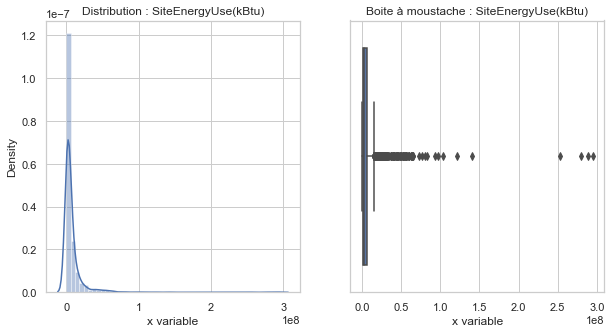

moy:
 7361876.889560292
med:
 2547041.9375
var:
 321134660089256.75
ect:
 17920230.469758384
skw:
 9.79438209705757
Decalage à droite
kur:
 133.69750379156488
Distribution concentrée


C:\Users\pouru\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

C:\Users\pouru\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



***********************************************************************************************
----------------------------------------ENERGYSTARScore----------------------------------------


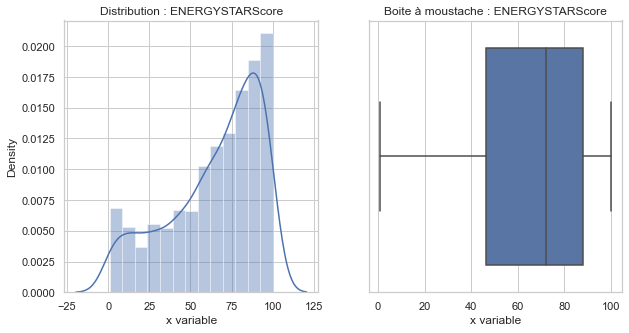

moy:
 64.72095070422536
med:
 72.0
var:
 780.5661157473464
ect:
 27.938613346895842
skw:
 -0.7511028994477672
Decalage à gauche
kur:
 -0.5267373835093792
Distribution aplatie


C:\Users\pouru\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

C:\Users\pouru\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



***********************************************************************************************
----------------------------------------TotalGHGEmissions----------------------------------------


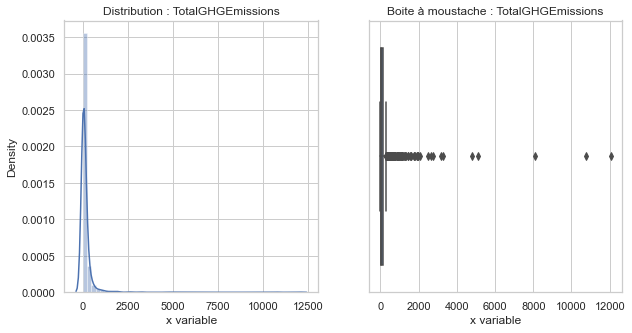

moy:
 160.23667170495756
med:
 49.75
var:
 295055.78514271224
ect:
 543.1903765188705
skw:
 14.286420281562837
Decalage à droite
kur:
 263.0220796002659
Distribution concentrée


In [118]:
import seaborn as sns
import matplotlib.pyplot as plt

def analyse_univarie(data, cat):
    sns.set_theme(style="whitegrid")
    fig, axs = plt.subplots(ncols=2, figsize = (10,5))
    x = pd.Series(data[cat], name="x variable")
    sns.distplot(x,ax=axs[0]).set(title='Distribution : ' + cat)
    sns.boxplot(x, ax=axs[1]).set(title='Boite à moustache : ' + cat)
    # affichage des indicateurs
    # decalage :
    decalage = 'bien centrée'
    if x.skew() > 0.1:
        decalage = 'Decalage à droite'
    elif x.skew() < -0.1:
        decalage = 'Decalage à gauche'
    # kurtosis
    concentration = 'Concentration nomale'
    if x.kurtosis() > 0.1:
        concentration = 'Distribution concentrée'
    elif x.kurtosis() < -0.1:
        concentration = 'Distribution aplatie'
        
    bord = "-"*40
    bordure = "*"*95
    print(bordure)
    print(bord + cat + bord)
    plt.show()
    print("moy:\n",x.mean())
    print("med:\n",x.median())
    print("var:\n",x.var())
    print("ect:\n",x.std())
    print("skw:\n",x.skew())
    print(decalage)
    print("kur:\n",x.kurtosis())
    print(concentration)

var_quantitatives = ['SiteEnergyUse(kBtu)',
                 'ENERGYSTARScore',
                 'TotalGHGEmissions']


for i in range(len(var_quantitatives)):
    analyse_univarie(data_merge, var_quantitatives[i])

###### Variables qualitatives

Nous voulons compter le nombre de modalités présentes dans les colonnes suivantes : BuildingType, PrimaryPropertyType, LargestPropertyUseType, SecondLargestPropertyUseType et ThirdLargestPropertyUseType.  

Avant de montrer les graphiques nous modifions notre data frame :
Nous plaçons dans 'Other' les modalités pour lequelles il y a moins de 30 occurences. En effet parfois il n'y a pas assez d'individus (souvant moins de 10) pour par la suite vouloir entrainer un modèle.

In [119]:
quali = ['BuildingType', 
         'PrimaryPropertyType', 
         'LargestPropertyUseType', 
         'SecondLargestPropertyUseType', 
         'ThirdLargestPropertyUseType']

for i in quali:
    data_count = pd.DataFrame(data_merge[i].value_counts()).reset_index()
    to_other = data_count[data_count[i]<30]['index'].values
    for j in to_other : 
         data_merge[i].replace({j: "Other"}, inplace=True)

data_merge = data_merge[data_merge['BuildingType'] != 'Nonresidential WA']

In [120]:
import plotly.express as px
data_count_BuildingType = pd.DataFrame(data_merge["BuildingType"].value_counts()).reset_index()
data_count_Primary = pd.DataFrame(data_merge["PrimaryPropertyType"].value_counts()).reset_index()
data_count_first = pd.DataFrame(data_merge["LargestPropertyUseType"].value_counts()).reset_index()
data_count_second = pd.DataFrame(data_merge["SecondLargestPropertyUseType"].value_counts()).reset_index()
data_count_third = pd.DataFrame(data_merge["ThirdLargestPropertyUseType"].value_counts()).reset_index()

fig = px.pie(data_count_BuildingType, values='BuildingType', names='index', title='BuildingType')
fig.show()
fig = px.pie(data_count_Primary, values='PrimaryPropertyType', names='index', title='PrimaryPropertyType')
fig.show()
fig = px.pie(data_count_first, values='LargestPropertyUseType', names='index', title='LargestPropertyUseType')
fig.show()
fig = px.pie(data_count_third, values='ThirdLargestPropertyUseType', names='index', title='ThirdLargestPropertyUseType')
fig.show()

In [121]:
data_merge = data_merge[data_merge['BuildingType'] != 'Nonresidential WA']

In [122]:
data_count_BuildingType = pd.DataFrame(data_merge["BuildingType"].value_counts()).reset_index()


#### Section 2.2 Analyse bivariée  <a class="anchor" id="section_2_2"></a>

 - Une première question intéressante et de connaitre ***l'influance de l'age des batiments*** sur les consomations que l'on cible : 

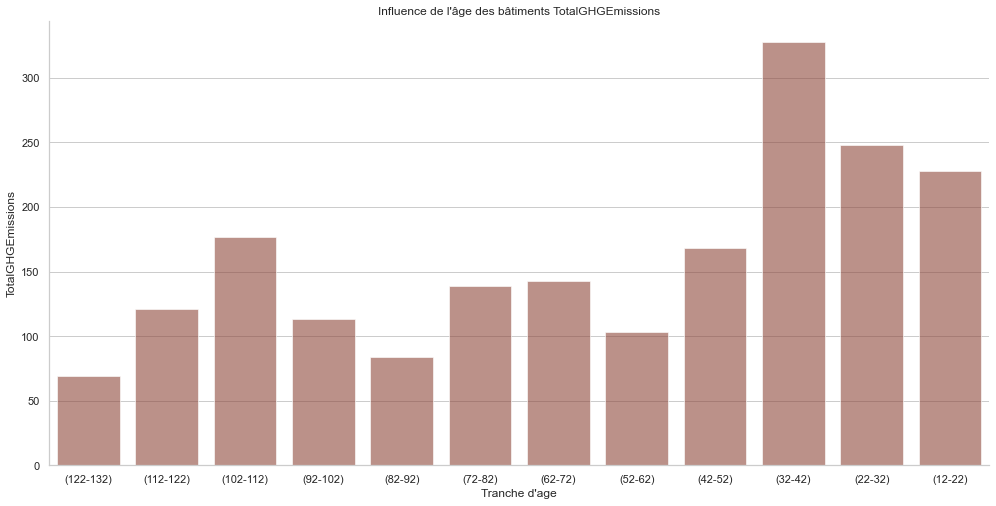

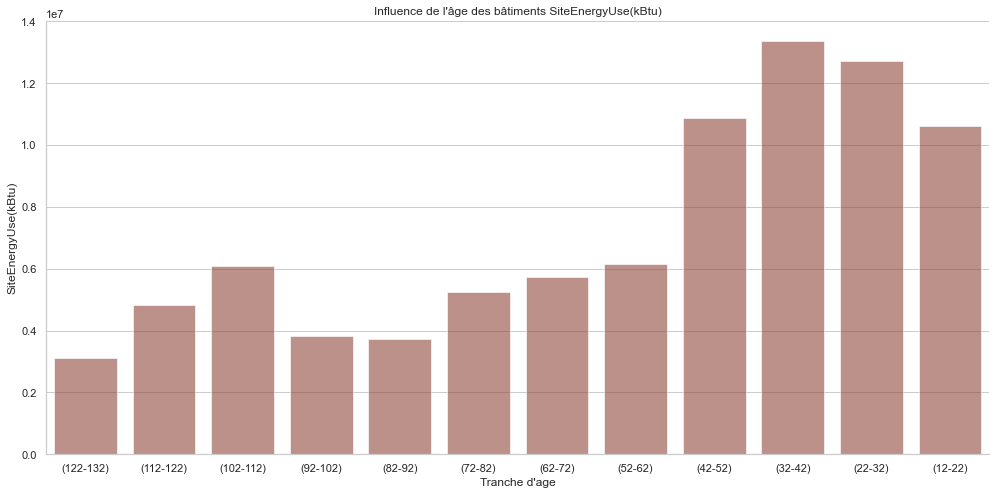

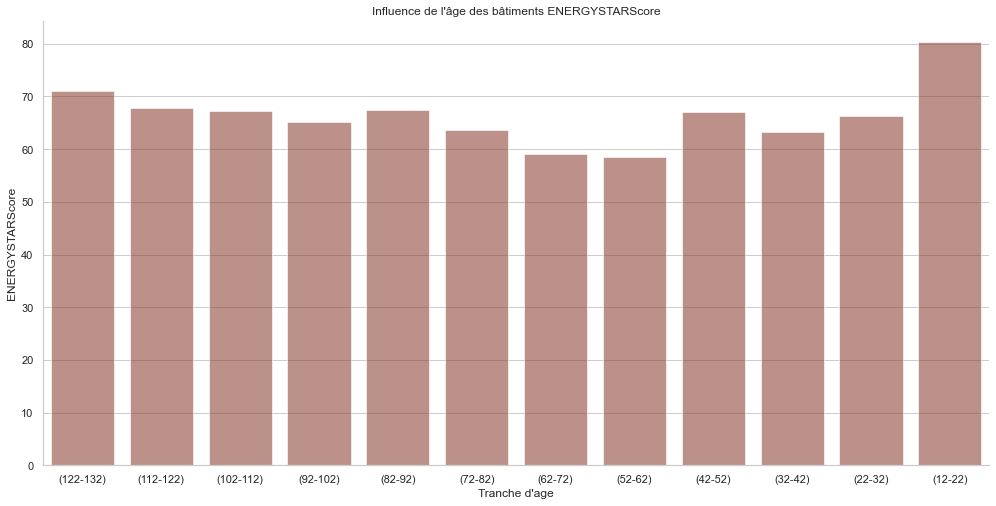

In [123]:
def moy_tranche_age(data,cat):
    age = []
    val_moy = []
    age_min = data['YearBuilt'].min()
    age_max = data['YearBuilt'].max()
    i = age_min
    while i < age_max:
        age_ = '(' + str(int(2022 - i)) + '-' + str(int(2022 - i + 10) ) + ')'
        moy_ = data[(data['YearBuilt']>=i) & (data['YearBuilt']<= i+10)][cat].mean()
        age.append(age_)
        val_moy.append(moy_)
        i = i + 10 
    res = pd.DataFrame({"Tranche d'age" : age, cat : val_moy})
    sns.catplot(
        data=res, kind="bar",
        x= "Tranche d'age", y=cat,
        ci=None, color="#9C3E2D", alpha=.6,
        height=7, aspect=2
    )
    plt.title("Influence de l'âge des bâtiments " + cat)
    plt.show()

moy_tranche_age(data_merge,'TotalGHGEmissions' )
moy_tranche_age(data_merge,'SiteEnergyUse(kBtu)' )
moy_tranche_age(data_merge,'ENERGYSTARScore' )

Nous pouvons observer qu'en moyenne plus le batiment est récent plus TotalGHGEmissions et SiteEnergyUse(kBtu) sont grands.
tandis que ENERGYSTARScore est lui constant sur la période  
L'age du batiment est donc une bonne feature !

 - Ensuite nous voulons savoir si ***la localisation influance*** les consomations que l'on cible : 

Pour cela nous avons conservé la variable 'Neighborhood', qui nous indique le quatier dans lequel se trouve la batiment.
Il y a un problème avec les majuscules, par exemple BALLARD et Ballard.
Nous mettons tout en minuscule : 

In [124]:
data_merge["Neighborhood"]= data_merge["Neighborhood"].str.lower() 
data_merge['Neighborhood'].replace({'delridge neighborhoods': "delridge"}, inplace = True)
downtown_mean = data_merge.groupby(['Neighborhood'])['TotalGHGEmissions'].agg(['mean'])
downtown_mean = downtown_mean.reset_index()

Text(0.5, 0.98, 'TotalGHGEmissions moyenne par downtown')

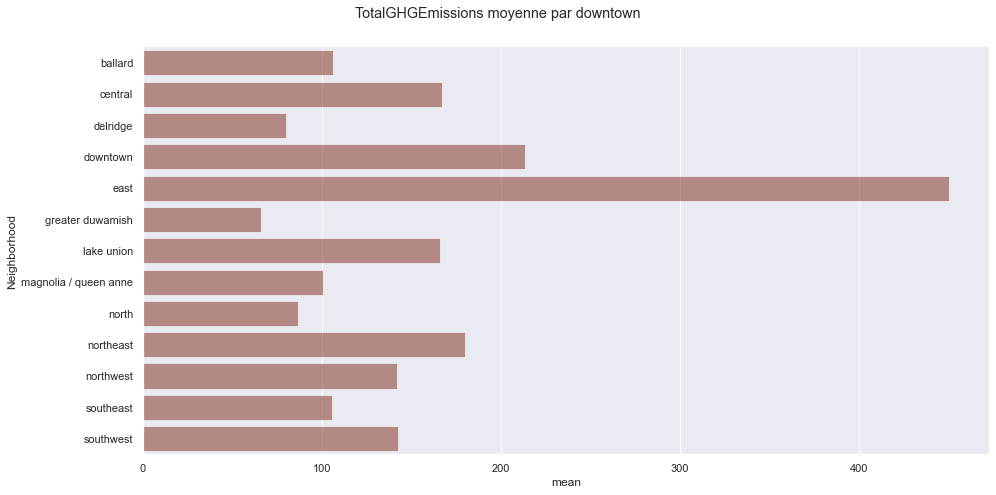

In [125]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
fig = sns.catplot(
    data=downtown_mean, kind="bar",
    x= "mean", y= 'Neighborhood',
    ci=None, color="#9C3E2D", alpha=.6,
    height=7, aspect=2
)
fig.fig.subplots_adjust(top=0.9)
fig.fig.suptitle('TotalGHGEmissions moyenne par downtown')


Text(0.5, 0.98, 'SiteEnergyUse(kBtu) moyenne par downtown')

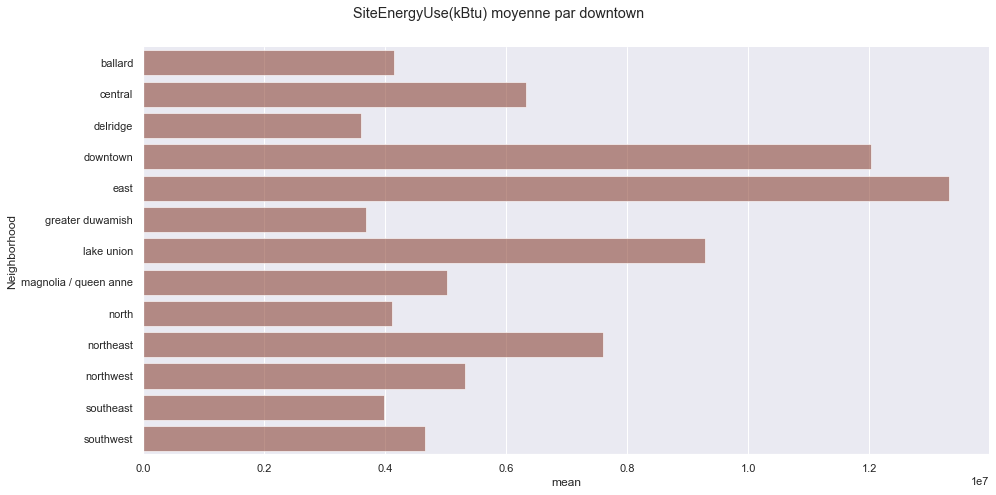

In [126]:

downtown_mean = data_merge.groupby(['Neighborhood'])['SiteEnergyUse(kBtu)'].agg(['mean'])
downtown_mean = downtown_mean.reset_index()
fig = sns.catplot(
    data=downtown_mean, kind="bar",
    x= "mean", y= 'Neighborhood',
    ci=None, color="#9C3E2D", alpha=.6,
    height=7, aspect=2
)
fig.fig.subplots_adjust(top=0.9)
fig.fig.suptitle('SiteEnergyUse(kBtu) moyenne par downtown')


In [127]:
def eta_squared(data,valeur,groupe, cat1 = None, cat2 = None):
    if cat1 != None:
        data = data[data[groupe].isin([cat1,cat2])]
    
    moyenne_y = data[valeur].mean()
    classes = []
    for classe in data[groupe].unique():
        yi_classe = data[data[groupe]==classe][valeur]
        classes.append({'ni': len(yi_classe),
                        'moyenne_classe': yi_classe.mean()})
    SCT = sum([(yj-moyenne_y)**2 for yj in data[valeur]])
    SCE = sum([c['ni']*(c['moyenne_classe']-moyenne_y)**2 for c in classes])
    return SCE/SCT

In [128]:
eta_squared(data_merge,'SiteEnergyUse(kBtu)','Neighborhood')

0.04033641634565057

- Heat map

Text(0.5, 1.0, 'Correlation ')

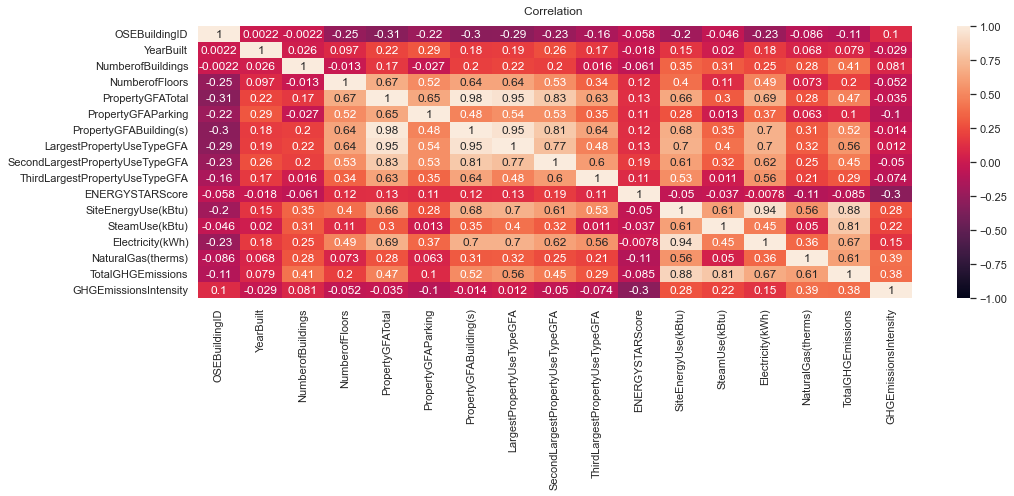

In [129]:
var_quant = []
for col_ in data_merge.columns:
    if data[col_].dtype != 'O': # différent de object
        var_quant.append(col_)
# Nous enlevons DataYear et OSEBuildingID      
plt.figure(figsize=(16,5))
heatmap = sns.heatmap(data_merge[var_quant].corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation ', fontdict={'fontsize':12}, pad=12)

In [130]:
fig = px.scatter(
        data_merge, x='SiteEnergyUse(kBtu)', y= 'NumberofFloors', opacity=0.65,
        trendline='ols', trendline_color_override='darkblue',
        title = 'Droite de régression SiteEnergyUse(kBtu) / NumberofFloors'
    )
fig.show()

##### Quantitatives / Quantitatives selon les catégories

Selon ***BuildingType***

In [131]:
fig = px.scatter_matrix(data_merge,
    dimensions=["SiteEnergyUse(kBtu)", "ENERGYSTARScore", "TotalGHGEmissions"],
    color="BuildingType")
fig.show()

Nous constatons plusieurs caractéristiques selon le ***'Building type'*** :   
Le type ***'SPS_DISTRICT K-12'*** à généralement un ENERGYSTARScore élevé et une émission de ***GHGE faible*** ainsi qu'une faible consomation d'énergie.  
Le type Nonresidential quant à lui prend généralement des valeurs légèrement supérieures mais non extrèmes. 

L'ANOVA montre cependent qu'il n'y a pas vraiment de différence entre les moyennes pour les 'Buiding type'

In [132]:
df = data_merge[data_merge['ENERGYSTARScore'].notna()]
print(eta_squared(df,'SiteEnergyUse(kBtu)','BuildingType'))
print(eta_squared(df,'ENERGYSTARScore','BuildingType'))
print(eta_squared(df,'TotalGHGEmissions','BuildingType'))

0.004808758079601935
0.04530457080374723
0.0013130097400680248


Selon ***PrimaryPropertyType***

In [133]:
fig = px.scatter_matrix(data_merge,
    dimensions=["SiteEnergyUse(kBtu)", "ENERGYSTARScore", "TotalGHGEmissions"],
    color="PrimaryPropertyType")
fig.show()

In [134]:
print(eta_squared(df,'SiteEnergyUse(kBtu)','PrimaryPropertyType'))
print(eta_squared(df,'ENERGYSTARScore','PrimaryPropertyType'))
print(eta_squared(df,'TotalGHGEmissions','PrimaryPropertyType'))

0.1407390648279222
0.12441024006500567
0.10580301332856372


On remarque alors une forte variance inter classe pour SiteEnergyUse(kBtu), TotalGHGEmissions. 'PrimaryPropertyType' semble très interessante pour notre analyse.

#### Section 2.3 Modifications du data frame  <a class="anchor" id="section_2_3"></a>

### Chapitre 3 Valeurs manquantes et selection des variables <a class="anchor" id="chapter3"></a>

***Etude des valeurs manquants***

In [135]:
data = data_merge
percentage_of_null_values = pd.DataFrame(data.isnull().sum()/len(data), columns = ["Valeur manquantes"])
percentage_of_null_values.sort_values(by='Valeur manquantes', ascending=False, inplace=True)
#percentage_of_null_values = percentage_of_null_values[percentage_of_null_values["Valeur manquantes"] > 0]
percentage_of_null_values = percentage_of_null_values.style.format({"Valeur manquantes": '{:.2%}'})
percentage_of_null_values

,Valeur manquantes
YearsENERGYSTARCertified,94.01%
ThirdLargestPropertyUseType,79.02%
ThirdLargestPropertyUseTypeGFA,78.72%
SecondLargestPropertyUseType,48.73%
SecondLargestPropertyUseTypeGFA,48.61%
ENERGYSTARScore,31.32%
LargestPropertyUseType,0.73%
LargestPropertyUseTypeGFA,0.73%
OSEBuildingID,0.00%
PropertyGFABuilding(s),0.00%


Comme nous pouvons le constater YearsENERGYSTARCertified possède trop de valeurs manquantes, nous allons la supprimer.   
concernant les "PropertyUseType" nous allons faire l'hypothèse suivante : Les valeurs Nan ne sont pas le fruit d'un manque de données collectées mais de plutot de l'absence de deuxième et troisième utilité du batiment, ce qui est une bonne information. Nous remplaçons alors les valeurs GFA à 0 et "non" à la place des Nan. 
(nous ne pouvons pas faire ceci pour LargestPropertyUseType, nous remplaçons alors par la médiane.

In [136]:
data_merge.drop(columns=["YearsENERGYSTARCertified"],inplace=True)
# pour LargestPropertyUseType
data_merge['LargestPropertyUseType'] = data_merge['LargestPropertyUseType'].fillna('Other')
data_merge['LargestPropertyUseTypeGFA'] = data_merge['LargestPropertyUseTypeGFA'].fillna(data_merge['LargestPropertyUseTypeGFA'].median())
# pour SecondLargestPropertyUseTypeGFA
data_merge['SecondLargestPropertyUseType'] = data_merge['SecondLargestPropertyUseType'].fillna('no')
data_merge['SecondLargestPropertyUseTypeGFA'] = data_merge['SecondLargestPropertyUseTypeGFA'].fillna(0)
# pour ThirdLargestPropertyUseTypeGFA
data_merge['ThirdLargestPropertyUseType'] = data_merge['ThirdLargestPropertyUseType'].fillna('no')
data_merge['ThirdLargestPropertyUseTypeGFA'] = data_merge['ThirdLargestPropertyUseTypeGFA'].fillna(0)

***Selection des variables*** 

Nous ne devons pas utliser des variables qui proviennent d'un relevé annuel mais seulement celles disponibles au moment du permis d'exploitation commerciale pour rappel nos targets sont : ***SiteEnergyUse(kBtu)*** et  ***TotalGHGEmissions'***.  

- Nous alors traiter le cas particulier de deux variables : SteamUse(kBtu) ainsi que NaturalGas(therms). En effet nous n'allons pas garder la valeur indiquée (triche) mais seulement distinguer les cas ou elle est égale à 0 ou alors strictement supérieure. Cette caractéristique doit-être présente lors du permis d'exploitation commerciale car elle définit les besoins du batiment)

- PropertyGFATotal n'est plus utile car nous avons les GFA pour les parkings et les 3 PropertyUseType.

- la longitude et la latitude ne sont plus vraiment utiles, nous avons gardé le down town pour la localisation qui est plus général. OSEBuildingID n'est lui aussi plus nécéssaire.

In [137]:
# on place à 0 pour l'utilisation ou non de vapeur
data_merge['SteamUse(kBtu)'][data_merge['SteamUse(kBtu)'] != 0]= 1
# Pareil pour le gaz naturel 
data_merge['NaturalGas(therms)'][data_merge['NaturalGas(therms)'] != 0]= 1
# on supprime PropertyGFATotal 
data_merge.drop(columns=["PropertyGFATotal"],inplace=True)
#Electricity(kWh) ne peut pas être utilisé
data_merge.drop(columns=["Electricity(kWh)"],inplace=True)
#GHGEmissionsIntensity est équivalente à notre target
data_merge.drop(columns=["GHGEmissionsIntensity"],inplace=True)
# longitude, latitude et OSEBuildingID
data_merge.drop(columns=["Longitude"],inplace=True)
data_merge.drop(columns=["Latitude"],inplace=True)
data_merge.drop(columns=["OSEBuildingID"],inplace=True)

C:\Users\pouru\AppData\Local\Temp/ipykernel_2484/3508427695.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\pouru\AppData\Local\Temp/ipykernel_2484/3508427695.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



### Chapitre 4 Sauvegarde du data frame final <a class="anchor" id="chapter4"></a>

Pour finir nous effectuons une transformation des variables catégorielles 

In [138]:
data_merge['SecondLargestPropertyUseType'].unique

<bound method Series.unique of 0            no
1            no
2       Parking
3       Parking
4       Parking
         ...   
1669         no
1670         no
1671      Other
1672      Other
1673      Other
Name: SecondLargestPropertyUseType, Length: 1654, dtype: object>

In [139]:
data_final = data_merge
var_qual = []
for col_ in data_final.columns:
    if data[col_].dtype == 'O': # différent de object
        var_qual.append(col_)
data_final[var_qual] = data_final[var_qual].astype('category')
data_final[var_qual] = data_final[var_qual].apply(lambda x: x.cat.codes)
data_final.head()

,BuildingType,PrimaryPropertyType,Neighborhood,LargestPropertyUseType,SecondLargestPropertyUseType,ThirdLargestPropertyUseType,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseTypeGFA,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEnergyUse(kBtu),SteamUse(kBtu),NaturalGas(therms),TotalGHGEmissions
0,0,7,3,6,4,5,1989.0,1.0,4.0,0.0,111077.0,43268.0,0.0,0.0,91.0,9898724.0,0.0,0.0,69.01
1,0,8,3,5,4,5,1906.0,1.0,6.0,25920.0,72450.0,98370.0,0.0,0.0,45.0,6525887.0,0.0,1.0,47.24
2,0,3,6,5,2,1,1947.0,1.0,4.0,37854.0,155934.0,138672.0,47539.0,11166.0,59.0,16760217.0,0.0,0.0,116.84
3,0,8,5,5,2,5,2008.0,1.0,3.0,21410.0,55188.0,55188.0,21410.0,0.0,76.0,4476997.0,0.0,1.0,134.69
4,0,3,6,5,2,5,1981.0,1.0,4.0,0.0,186971.0,186977.0,115477.0,0.0,86.0,12662456.0,0.0,1.0,226.92


In [140]:
data_final.to_csv('data_final_last.csv')

In [142]:
data_merge['SecondLargestPropertyUseType'].unique()

array([4, 2, 0, 3, 1], dtype=int8)